In [14]:
import pandas as pd

In [15]:
#path to your Excel file
file_path = 'data.xlsx'

# Load the Excel file
df = pd.read_excel(file_path)

# Preview the first few rows
print(df.head())


   ID  Patient Age Patient Sex Left-Fundus Right-Fundus  \
0   0           69      Female  0_left.jpg  0_right.jpg   
1   1           57        Male  1_left.jpg  1_right.jpg   
2   2           42        Male  2_left.jpg  2_right.jpg   
3   3           66        Male  3_left.jpg  3_right.jpg   
4   4           53        Male  4_left.jpg  4_right.jpg   

                            Left-Diagnostic Keywords  \
0                                           cataract   
1                                      normal fundus   
2  laser spot，moderate non proliferative retinopathy   
3                                      normal fundus   
4                        macular epiretinal membrane   

                Right-Diagnostic Keywords  N  D  G  C  A  H  M  O  
0                           normal fundus  0  0  0  1  0  0  0  0  
1                           normal fundus  1  0  0  0  0  0  0  0  
2  moderate non proliferative retinopathy  0  1  0  0  0  0  0  1  
3         branch retinal artery occl

In [16]:
import numpy as np

In [7]:
# Initialize an empty dictionary to hold the mappings
image_labels = {}

# Iterate through each row of the DataFrame
for index, row in df.iterrows():
    # Left fundus image
    left_image = row['Left-Fundus']
    left_labels = {
        'Keywords': row['Left-Diagnostic Keywords'],
        'N': row['N'],
        'D': row['D'],
        'G': row['G'],
        'C': row['C'],
        'A': row['A'],
        'H': row['H'],
        'M': row['M'],
        'O': row['O']
    }
    
    # Map the left image to its labels
    image_labels[left_image] = left_labels
    
    # Right fundus image
    right_image = row['Right-Fundus']
    right_labels = {
        'Keywords': row['Right-Diagnostic Keywords'],
        'N': row['N'],
        'D': row['D'],
        'G': row['G'],
        'C': row['C'],
        'A': row['A'],
        'H': row['H'],
        'M': row['M'],
        'O': row['O']
    }
    
    # Map the right image to its labels
    image_labels[right_image] = right_labels

# Display the first 5 entries
for i, (image_name, labels) in enumerate(image_labels.items()):
    print(f"Image: {image_name}, Labels: {labels}")
    if i == 4:  # Display only the first 5 entries
        break

Image: 0_left.jpg, Labels: {'Keywords': 'cataract', 'N': 0, 'D': 0, 'G': 0, 'C': 1, 'A': 0, 'H': 0, 'M': 0, 'O': 0}
Image: 0_right.jpg, Labels: {'Keywords': 'normal fundus', 'N': 0, 'D': 0, 'G': 0, 'C': 1, 'A': 0, 'H': 0, 'M': 0, 'O': 0}
Image: 1_left.jpg, Labels: {'Keywords': 'normal fundus', 'N': 1, 'D': 0, 'G': 0, 'C': 0, 'A': 0, 'H': 0, 'M': 0, 'O': 0}
Image: 1_right.jpg, Labels: {'Keywords': 'normal fundus', 'N': 1, 'D': 0, 'G': 0, 'C': 0, 'A': 0, 'H': 0, 'M': 0, 'O': 0}
Image: 2_left.jpg, Labels: {'Keywords': 'laser spot，moderate non proliferative retinopathy', 'N': 0, 'D': 1, 'G': 0, 'C': 0, 'A': 0, 'H': 0, 'M': 0, 'O': 1}


In [ ]:
import cv2
import numpy as np
import os

# Set the desired image size
image_size = (128, 128)  # Example size

# Initialize lists to hold processed images and labels
X = []  # Image data
y = []  # Labels

# Path to the directory containing images 
image_directory = r'C:\--path from your computer--\ODIR-5K\Training Images'  

# Iterate over the image_labels dictionary to load and preprocess images
for image_name, labels in image_labels.items():
    # Load the image
    img_path = os.path.join(image_directory, image_name)
    image = cv2.imread(img_path)

    # Check if the image was loaded successfully
    if image is not None:
        # Resize the image
        image_resized = cv2.resize(image, image_size)

        # Normalize the image
        image_normalized = image_resized / 255.0

        # Append the processed image to the list
        X.append(image_normalized)

        # Create a label array (can choose specific labels or multiple)
        label_array = [labels['N'], labels['D'], labels['G'], labels['C'], 
                       labels['A'], labels['H'], labels['M'], labels['O']]
        y.append(label_array)

# Convert lists to NumPy arrays
X = np.array(X, dtype=np.float32)
y = np.array(y)

print(f'Processed {len(X)} images.')
print(f'Sample labels: {y[0]}')  # Display the first label array

Processed 7000 images.
Sample labels: [0 0 0 1 0 0 0 0]


In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [20]:
# Define the CNN architecture with eight output neurons for multi-label classification
def create_multi_label_cnn_model(input_shape):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    
    # Eight neurons for eight labels, each with sigmoid activation
    model.add(layers.Dense(8, activation='sigmoid'))

    return model

# Create and compile the model
input_shape = (128, 128, 3)  # Based on your preprocessed image dimensions
cnn_model_multi_label = create_multi_label_cnn_model(input_shape)

cnn_model_multi_label.compile(optimizer='adam',
                              loss='binary_crossentropy',  # Suitable for multi-label classification
                              metrics=['accuracy'])

# Train the model again
history = cnn_model_multi_label.fit(X, y, epochs=5, batch_size=32, validation_split=0.2)


F:\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
175/175 ━━━━━━━━━━━━━━━━━━━━ 108s 422ms/step - accuracy: 0.3348 - loss: 0.3848 - val_accuracy: 0.0507 - val_loss: 0.4273
Epoch 2/5
175/175 ━━━━━━━━━━━━━━━━━━━━ 69s 395ms/step - accuracy: 0.3591 - loss: 0.3473 - val_accuracy: 0.0421 - val_loss: 0.4121
Epoch 3/5
175/175 ━━━━━━━━━━━━━━━━━━━━ 71s 404ms/step - accuracy: 0.3775 - loss: 0.3419 - val_accuracy: 0.0479 - val_loss: 0.4148
Epoch 4/5
175/175 ━━━━━━━━━━━━━━━━━━━━ 70s 399ms/step - accuracy: 0.3658 - loss: 0.3360 - val_accuracy: 0.0800 - val_loss: 0.3934
Epoch 5/5
175/175 ━━━━━━━━━━━━━━━━━━━━ 69s 397ms/step - accuracy: 0.3945 - loss: 0.3262 - val_accuracy: 0.0443 - val_loss: 0.3940


In [ ]:
import cv2
import numpy as np
import os

# Set the desired image size
image_size = (128, 128)  # Example size

# Path to the directory containing test images (adjust as necessary)
test_image_directory = r'C:\--path from your computer--\ODIR-5K\Testing Images'  # Replace with actual path

# Initialize list for test data
X_test_unlabeled = []

# Iterate over the test images in the folder
for image_name in os.listdir(test_image_directory):
    img_path = os.path.join(test_image_directory, image_name)
    image = cv2.imread(img_path)
    
    if image is not None:
        # Resize and normalize the image
        image_resized = cv2.resize(image, image_size)
        image_normalized = image_resized / 255.0
        X_test_unlabeled.append(image_normalized)

# Convert list to NumPy array
X_test_unlabeled = np.array(X_test_unlabeled, dtype=np.float32)

# Make predictions using the trained model
predictions = cnn_model_multi_label.predict(X_test_unlabeled)

# Display predictions for each test image
for i, prediction in enumerate(predictions):
    print(f"Test Image {i+1} Predictions:")
    for label, prob in zip(['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O'], prediction):
        print(f"  {label}: {prob:.4f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step
Test Image 1 Predictions:
  N: 0.3885
  D: 0.1225
  G: 0.1540
  C: 0.1742
  A: 0.0149
  H: 0.0072
  M: 0.0091
  O: 0.2589
Test Image 2 Predictions:
  N: 0.3988
  D: 0.1234
  G: 0.1579
  C: 0.1184
  A: 0.0112
  H: 0.0050
  M: 0.0065
  O: 0.2865
Test Image 3 Predictions:
  N: 0.1997
  D: 0.2613
  G: 0.0533
  C: 0.2885
  A: 0.0563
  H: 0.0150
  M: 0.0020
  O: 0.4157
Test Image 4 Predictions:
  N: 0.2005
  D: 0.2220
  G: 0.0387
  C: 0.3956
  A: 0.0552
  H: 0.0100
  M: 0.0010
  O: 0.4025
Test Image 5 Predictions:
  N: 0.3392
  D: 0.1466
  G: 0.0646
  C: 0.0389
  A: 0.0389
  H: 0.0181
  M: 0.0178
  O: 0.3815
Test Image 6 Predictions:
  N: 0.3745
  D: 0.1878
  G: 0.1135
  C: 0.0159
  A: 0.0186
  H: 0.0160
  M: 0.0153
  O: 0.3195
Test Image 7 Predictions:
  N: 0.2632
  D: 0.1335
  G: 0.0223
  C: 0.0290
  A: 0.0677
  H: 0.0281
  M: 0.0993
  O: 0.3840
Test Image 8 Predictions:
  N: 0.4159
  D: 0.1532
  G: 0.0319
  C: 0.0131
  A: 0.0377
  H: 0.0151
  M: 0.

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step


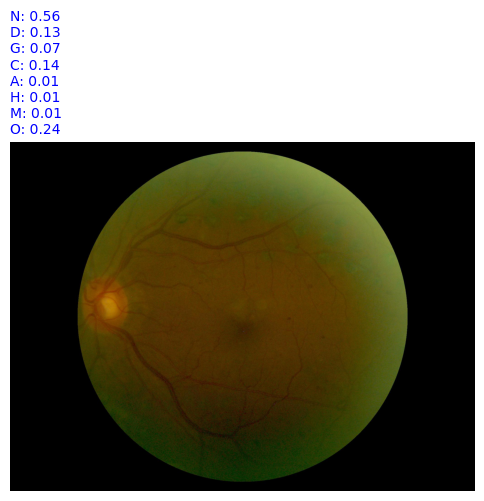

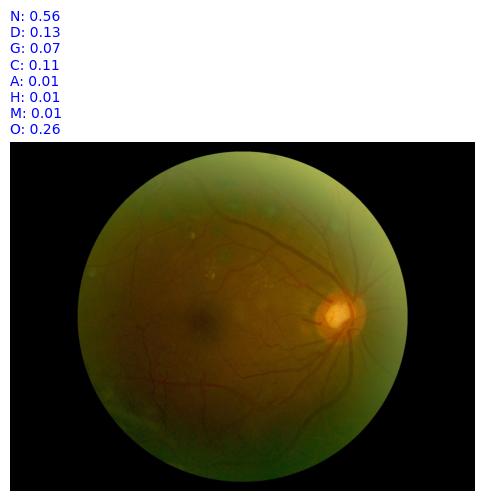

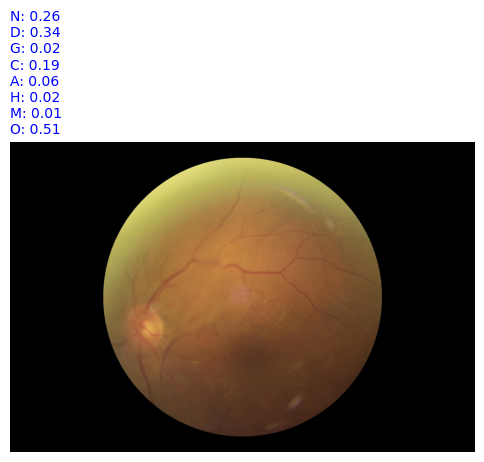

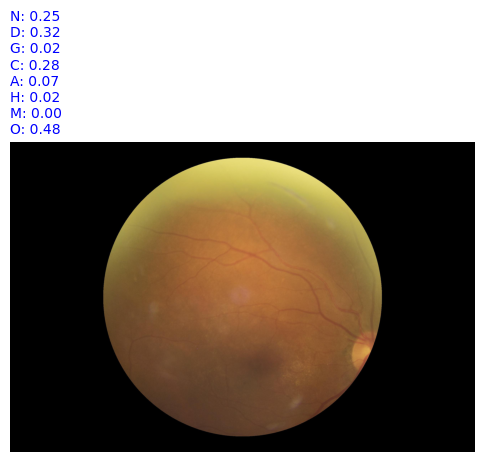

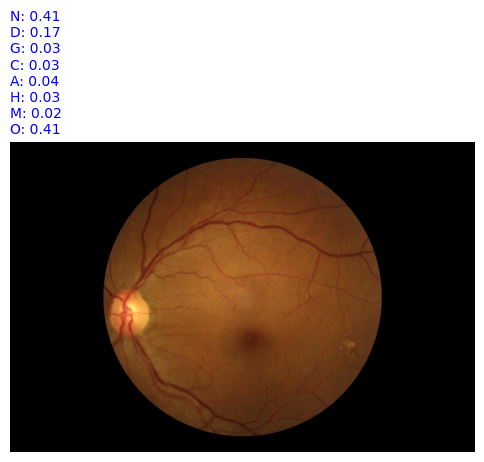

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Set the desired image size
image_size = (128, 128)  # Example size

# Path to the directory containing test images (adjust as necessary)
test_image_directory = r'C:\--path from your computer--\ODIR-5K\Testing Images'  

# Initialize list for test data
X_test_unlabeled = []
image_paths = []  # To store paths for displaying images later

# Iterate over the test images in the folder
for image_name in os.listdir(test_image_directory):
    img_path = os.path.join(test_image_directory, image_name)
    image = cv2.imread(img_path)
    
    if image is not None:
        # Resize and normalize the image
        image_resized = cv2.resize(image, image_size)
        image_normalized = image_resized / 255.0
        X_test_unlabeled.append(image_normalized)
        image_paths.append(img_path)  # Save the image path

# Convert list to NumPy array
X_test_unlabeled = np.array(X_test_unlabeled, dtype=np.float32)

# Make predictions using the trained model
predictions = cnn_model_multi_label.predict(X_test_unlabeled)

# Display each test image with its predictions
for i, (prediction, img_path) in enumerate(zip(predictions, image_paths)):
    # Load and display the original image
    image = cv2.imread(img_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for displaying
    
    plt.figure(figsize=(6, 6))
    plt.imshow(image_rgb)
    plt.axis('off')
    
    # Display the probabilities for each label on the image
    labels = ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']
    probabilities = [f"{label}: {prob:.2f}" for label, prob in zip(labels, prediction)]
    plt.title("\n".join(probabilities), loc='left', fontsize=10, color='blue')
    
    # Show the image
    plt.show()
    
    # Optional: Stop after displaying a few images for easier viewing
    if i == 4:  # Show only the first 5 images, for example
        break
